#### Student Name : Sapna Girme

**AI ASSIGNMENT 2**

## Penguin Classification Analysis

## Load the dataset into the tool

In [62]:
import pandas as pd
df=pd.read_csv('penguins_size.csv')

In [63]:
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [65]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [66]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

## Check for Missing values and deal with them.

In [67]:
import numpy as np
df.replace(".",np.nan,inplace=True)

In [68]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [69]:
#df['sex'].replace(np.nan,'MALE',inplace=True)
df["sex"].fillna(df['sex'].mode()[0],inplace=True)

In [70]:
df['sex'].value_counts()

sex
MALE      179
FEMALE    165
Name: count, dtype: int64

In [71]:
# Handling Null Values
import warnings
warnings.filterwarnings("ignore")
df["culmen_length_mm"].fillna(df['culmen_length_mm'].mean(),inplace=True)
df["culmen_depth_mm"].fillna(df['culmen_depth_mm'].mean(),inplace=True)
df["flipper_length_mm"].fillna(df['flipper_length_mm'].mean(),inplace=True)
df["body_mass_g"].fillna(df['body_mass_g'].mean(),inplace=True)

In [72]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [73]:
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


## Perform descriptive statistics on the dataset

In [74]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Find the outliers and replace them outliers

Text(0, 0.5, 'body_mass_g')

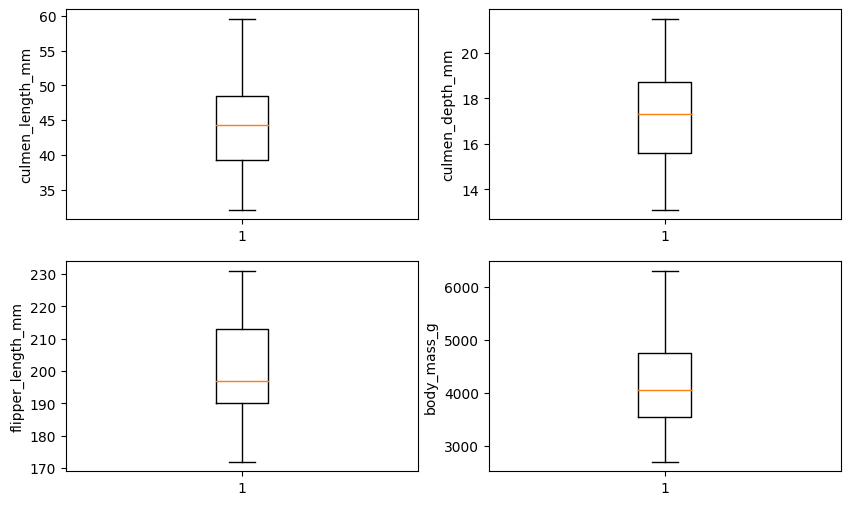

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df['culmen_length_mm'])
plt.ylabel('culmen_length_mm')

plt.subplot(2,2,2)
plt.boxplot(df['culmen_depth_mm'])
plt.ylabel('culmen_depth_mm')

plt.subplot(2,2,3)
plt.boxplot(df['flipper_length_mm'])
plt.ylabel('flipper_length_mm')

plt.subplot(2,2,4)
plt.boxplot(df['body_mass_g'])
plt.ylabel('body_mass_g')

#### As we could see that there are no outliers present in the dataset

## Univariate Analysis

Text(0.5, 1.0, 'Number of Island')

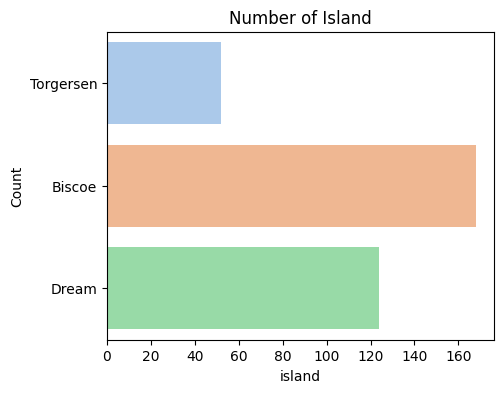

In [76]:
# Count of Island
import seaborn as sns
plt.figure(figsize=(5, 4))
sns.countplot(df['island'],palette="pastel")
plt.xlabel('island')
plt.ylabel('Count')
plt.title('Number of Island')

Text(0.5, 1.0, 'Number of Sex')

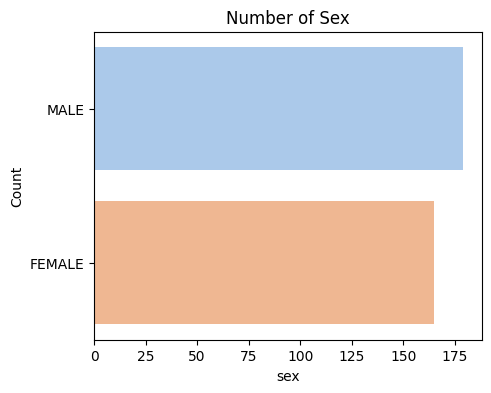

In [77]:
# Count of Species
plt.figure(figsize=(5, 4))
sns.countplot(df['sex'],palette="pastel")
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Number of Sex')

## Bi-variate Analysis

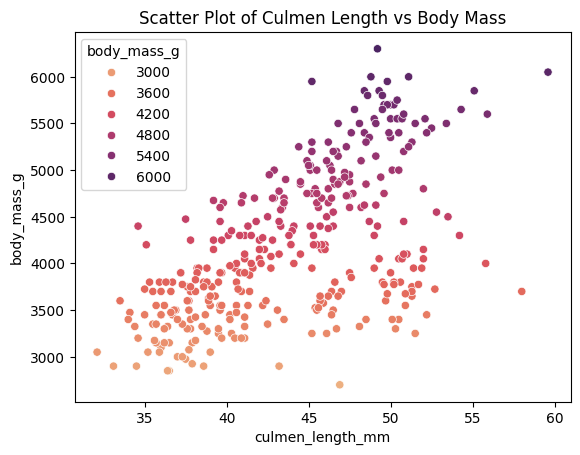

In [78]:
# Scatter plot of culmen length against body mass
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', data=df,hue='body_mass_g',palette='flare')
plt.title('Scatter Plot of Culmen Length vs Body Mass')
plt.show()

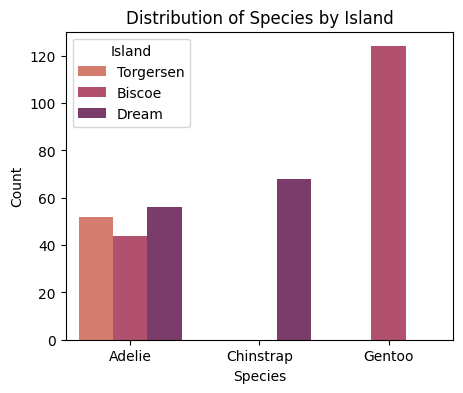

In [79]:
#distrubution of species by island
plt.figure(figsize=(5, 4))
sns.countplot(x='species', hue='island', data=df,palette="flare")
plt.title('Distribution of Species by Island')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Island')
plt.show()

## Multi-variate Analysis

In [80]:
correlation_matrix = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']].corr()
correlation_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
culmen_length_mm,1.000000,-0.235053,0.656181
culmen_depth_mm,-0.235053,1.000000,-0.583851
flipper_length_mm,0.656181,-0.583851,1.000000


<Axes: >

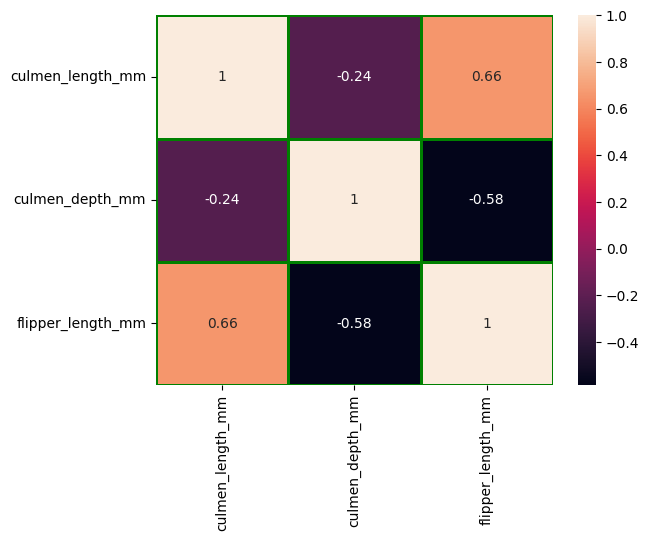

In [81]:
sns.heatmap(correlation_matrix, annot=True,linecolor='green',linewidths=2)

## Descriptive Statistics

In [82]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Check for Categorical columns and perform encoding

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [85]:
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])

In [86]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


## Split the data into dependent and independent variables

In [87]:
x=df.drop('species',axis=1)
y=df['species']

In [88]:
x.head() # independent variables

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,1
1,2,39.50000,17.40000,186.000000,3800.000000,0
2,2,40.30000,18.00000,195.000000,3250.000000,0
3,2,43.92193,17.15117,200.915205,4201.754386,1
4,2,36.70000,19.30000,193.000000,3450.000000,0


In [89]:
y.head() #dependent variable

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

## Scaling the data

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
norm=MinMaxScaler()

In [92]:
x=norm.fit_transform(x)

In [93]:
x

array([[1.        , 0.25454545, 0.66666667, 0.15254237, 0.29166667,
        1.        ],
       [1.        , 0.26909091, 0.51190476, 0.23728814, 0.30555556,
        0.        ],
       [1.        , 0.29818182, 0.58333333, 0.38983051, 0.15277778,
        0.        ],
       ...,
       [0.        , 0.66545455, 0.30952381, 0.84745763, 0.84722222,
        1.        ],
       [0.        , 0.47636364, 0.20238095, 0.6779661 , 0.69444444,
        0.        ],
       [0.        , 0.64727273, 0.35714286, 0.69491525, 0.75      ,
        1.        ]])

## Split the data into training and testing

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Implemetation of decison tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
from sklearn.metrics import accuracy_score
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9519230769230769


In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score
dt_precision = precision_score(y_test, dt_pred,average='macro')
print("Precision:", dt_precision)
dt_recall = recall_score(y_test, dt_pred,average='macro')
print("Recall:", dt_recall)
dt_f1score = f1_score(y_test, dt_pred,average='macro')
print("F1 Score:", dt_f1score)

Precision: 0.9377970885323826
Recall: 0.9535294117647058
F1 Score: 0.9448446045084701


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.86      0.95      0.90        20
           2       0.97      0.97      0.97        34

    accuracy                           0.95       104
   macro avg       0.94      0.95      0.94       104
weighted avg       0.95      0.95      0.95       104



## Implemetation of K- Nearest Neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [100]:
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Decision Tree Accuracy:", knn_accuracy)

Decision Tree Accuracy: 0.9903846153846154


In [111]:
knn_precision = precision_score(y_test, knn_pred,average='macro')
print("Precision:", knn_precision)
knn_recall = recall_score(y_test, knn_pred,average='macro')
print("Recall:", knn_recall)
knn_f1score = f1_score(y_test, knn_pred,average='macro')
print("F1 Score:", knn_f1score)

Precision: 0.9841269841269842
Recall: 0.9933333333333333
F1 Score: 0.9885029153321837


In [101]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        34

    accuracy                           0.99       104
   macro avg       0.98      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Implemetation of Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [108]:
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9711538461538461


In [112]:
rf_precision = precision_score(y_test, rf_pred,average='macro')
print("Precision:", rf_precision)
rf_recall = recall_score(y_test, rf_pred,average='macro')
print("Recall:", rf_recall)
rf_f1score = f1_score(y_test, rf_pred,average='macro')
print("F1 Score:", rf_f1score)

Precision: 0.9614512471655329
Recall: 0.9700000000000001
F1 Score: 0.9655087459965509


In [104]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        34

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



In [113]:
a = {
    'Model': ['Decision Tree', 'KNN', 'Random Forest'],
    'Accuracy': [dt_accuracy, knn_accuracy, rf_accuracy],
    'Precision': [dt_precision, knn_precision, rf_precision],
    'Recall': [dt_recall, knn_recall, rf_recall],
    'F1 Score': [dt_f1score, knn_f1score, rf_f1score]
}
metrics_df = pd.DataFrame(a)
print(metrics_df)

           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.951923   0.937797  0.953529  0.944845
1            KNN  0.990385   0.984127  0.993333  0.988503
2  Random Forest  0.971154   0.961451  0.970000  0.965509


### As we can see KNN model gives the best accuracy compare to decision tree and random forest , so we can say that KNN is the best model for this type of classification